In [ ]:
#importation des bibliothèques nécessaires
import io
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
data_to_load = files.upload()

Saving dataset.xlsx to dataset.xlsx


In [ ]:
#Lecture des données
df = pd.read_excel(io.BytesIO(data_to_load['dataset.xlsx']))
data = df.copy()

In [ ]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Unnamed: 111,cought,fever,sore_throat,shortness_ofbreath,head_ache
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
#remplacer les espaces par _
data.columns = [x.lower().strip().replace(' ','_') for x in data.columns]

In [ ]:
#supprimer la colonne 'unnamed:_111'
del(data['unnamed:_111'])

In [ ]:
data = data.rename(columns = {'partial_thromboplastin_time (ptt)':'partial_thromboplastin_time'})

In [ ]:
#suppression des trois colonnes
data.drop(columns=['patient_addmited_to_regular_ward_(1=yes,_0=no)',
                      'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
                      'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)'], inplace=True)

In [ ]:
# Calcul des valeurs nulles 
total_null_values = data.isnull().sum().sort_values(ascending=False) 
not_null_values = data.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (data.isnull().sum()/data.notnull().count().sort_values(ascending=False)) * 100

dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Pourcentage': null_values_percentage}, axis=1)

dataset_missing_values

,Null,Not Null,Pourcentage
mycoplasma_pneumoniae,5644,0,100.000000
partial_thromboplastin_time,5644,0,100.000000
"prothrombin_time_(pt),_activity",5644,0,100.000000
d-dimer,5644,0,100.000000
urine_-_sugar,5644,0,100.000000
urine_-_nitrite,5643,1,99.982282
fio2_(venous_blood_gas_analysis),5643,1,99.982282
vitamin_b12,5641,3,99.946846
lipase_dosage,5636,8,99.858257
albumin,5631,13,99.769667


Text(0.5, 1.0, 'Missing Data in our Dataset')

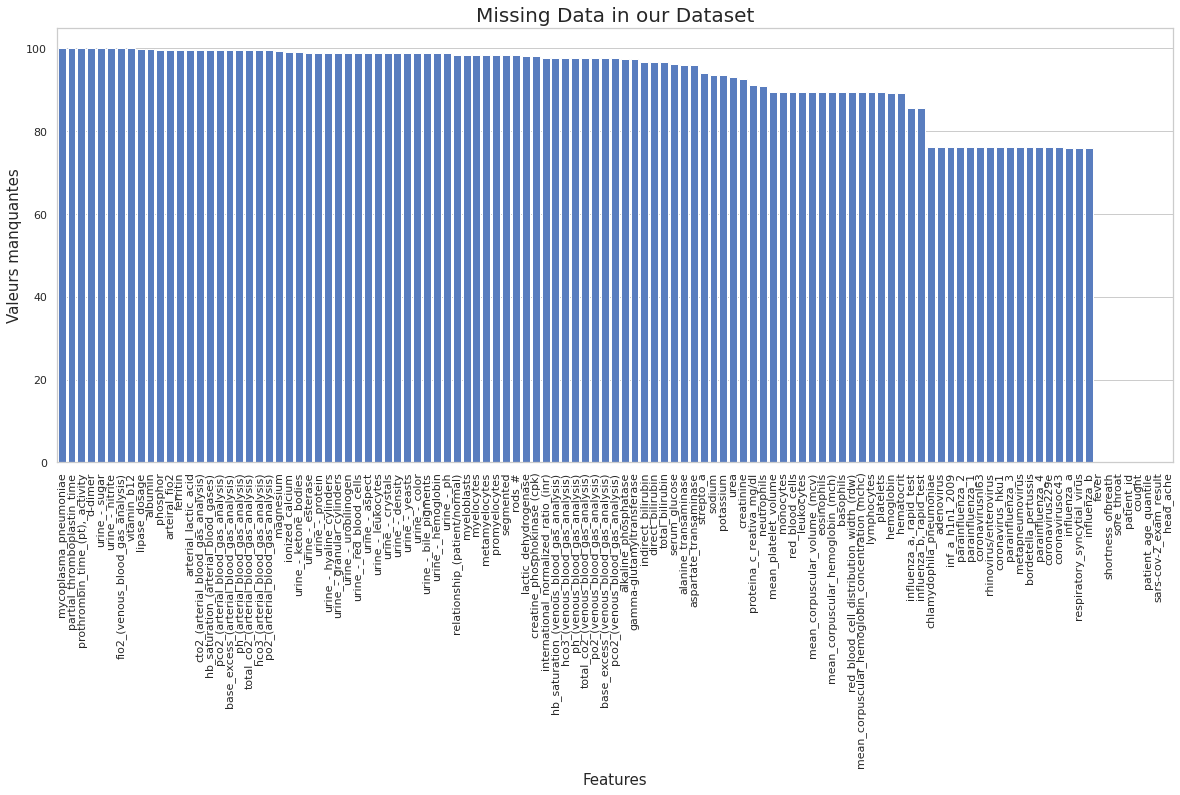

In [ ]:
#visualisation des valeurs nulles
sns.set(style="whitegrid")
fig, axs = plt.subplots(figsize=(20,8))

sns.set_color_codes("muted")
sns.barplot(x=dataset_missing_values.index, y="Pourcentage", data=dataset_missing_values, color="b")

plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Valeurs manquantes', fontsize=15)
plt.title('Missing Data in our Dataset', fontsize=20)

In [ ]:
dataset_missing_values[dataset_missing_values['Not Null'] <= 10]

,Null,Not Null,Pourcentage
mycoplasma_pneumoniae,5644,0,100.000000
partial_thromboplastin_time,5644,0,100.000000
"prothrombin_time_(pt),_activity",5644,0,100.000000
d-dimer,5644,0,100.000000
urine_-_sugar,5644,0,100.000000
urine_-_nitrite,5643,1,99.982282
fio2_(venous_blood_gas_analysis),5643,1,99.982282
vitamin_b12,5641,3,99.946846
lipase_dosage,5636,8,99.858257


In [ ]:
#suppression des colonnes ayant moins de 10 valeurs
data.drop(columns=['d-dimer','partial_thromboplastin_time','mycoplasma_pneumoniae','prothrombin_time_(pt),_activity','urine_-_sugar','fio2_(venous_blood_gas_analysis)','urine_-_nitrite','vitamin_b12','lipase_dosage'], inplace=True)

In [ ]:
#remplacer les valeurs nulles par 0
data = data.fillna(0)

In [ ]:
# Encodage des données catégorielle 
data.replace('not_detected', 0, inplace=True)
data.replace('detected', 1, inplace=True)
data.replace('absent', 0, inplace=True)
data.replace('present', 1, inplace=True)
data.replace('negative', 0, inplace=True)
data.replace('positive', 1, inplace=True)

In [ ]:
corr_matrix = abs(data.corr())

In [ ]:
corr_target = corr_matrix["sars-cov-2_exam_result"]

In [ ]:
corr_target.sort_values(ascending = False)                                           

sars-cov-2_exam_result                              1.000000e+00
fever                                               5.893435e-01
sore_throat                                         5.773446e-01
cought                                              5.548469e-01
shortness_ofbreath                                  4.724318e-01
head_ache                                           4.009927e-01
leukocytes                                          1.088353e-01
platelets                                           1.064816e-01
patient_age_quantile                                7.524442e-02
rhinovirus/enterovirus                              7.463850e-02
monocytes                                           7.443121e-02
eosinophils                                         7.265897e-02
red_blood_cells                                     4.576615e-02
inf_a_h1n1_2009                                     4.403034e-02
mean_platelet_volume                                4.062155e-02
hemoglobin               

In [ ]:
#Matrice de correlation
relevant_features = ["platelets","leukocytes","eosinophils","monocytes","hemoglobin","cto2_(arterial_blood_gas_analysis)","pco2_(arterial_blood_gas_analysis)","fever","sore_throat","cought","shortness_ofbreath","head_ache"]

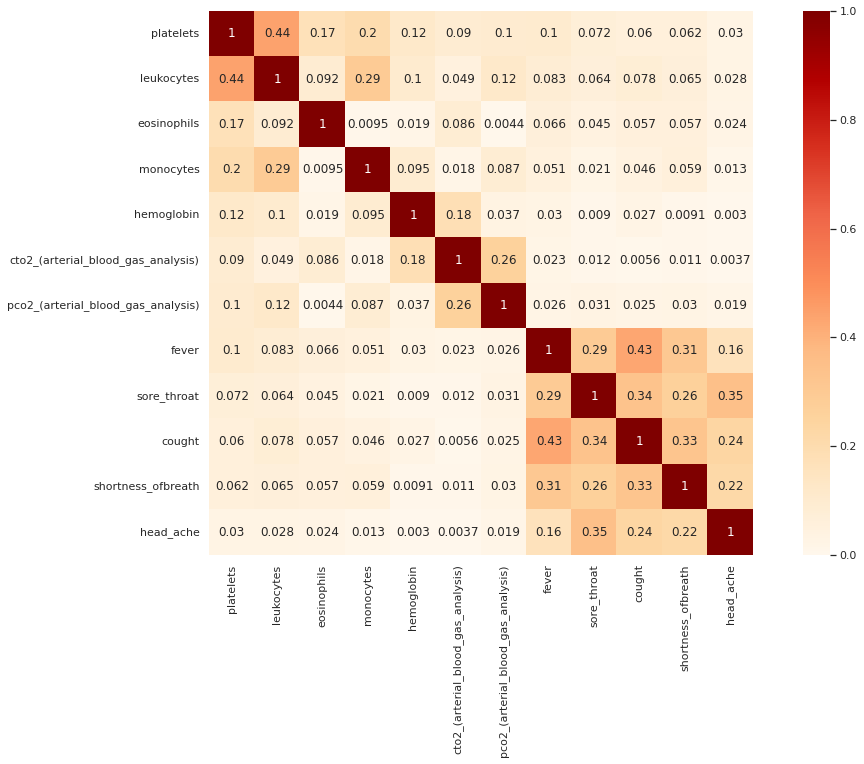

In [ ]:
fig, axs = plt.subplots(figsize=(18, 10))
sns.heatmap(abs(data[relevant_features].corr()), yticklabels=relevant_features, xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='OrRd')

In [ ]:
#Séparation des données d'entrainement et de test
target = data['sars-cov-2_exam_result']

features = data.select_dtypes(exclude=[object])
del(features['sars-cov-2_exam_result'])
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify = target)

In [ ]:
Models_scores = {}

In [ ]:
#Gridsearchcv KNN
param_grid = {'n_neighbors' : np.arange(1,50)}
knn =  KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train,y_train)
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': 1}
The best score we have achieved is: 0.9453164556962026


In [ ]:
#KNN
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)
y_Knn = KNN.predict(X_test)
score_Knn = KNN.score(X_test, y_test)
score_Knn

0.9521841794569067

In [ ]:
cr_Knn = classification_report(y_test, y_Knn)
print(cr_Knn)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1527
           1       0.82      0.66      0.73       167

    accuracy                           0.95      1694
   macro avg       0.89      0.82      0.85      1694
weighted avg       0.95      0.95      0.95      1694



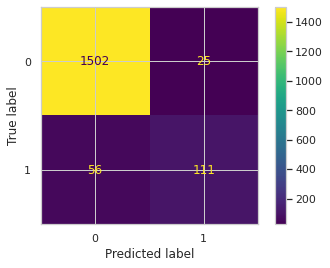

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN, X_test, y_test)  
plt.show()

In [ ]:
Models_scores['KNN'] = [score_Knn,cr_Knn]

In [ ]:
#Gridsearch SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)


In [ ]:
#SVM
clf = svm.SVC(kernel='linear', C=10, gamma= 0.01)
clf.fit(X_train, y_train)
y_svm = clf.predict(X_test)
score_Svm = clf.score(X_test, y_test)
score_Svm

0.961629279811098

In [ ]:
cr_Svm = classification_report(y_test, y_svm)
print(cr_Svm)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1527
           1       0.77      0.88      0.82       167

    accuracy                           0.96      1694
   macro avg       0.88      0.93      0.90      1694
weighted avg       0.96      0.96      0.96      1694



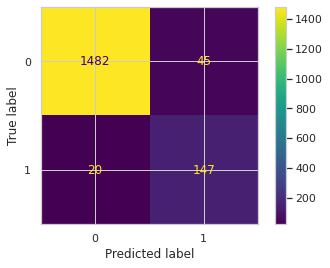

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
Models_scores['SVM'] = [score_Svm,cr_Svm]

In [ ]:
#Gridsearch régression logistique
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)
print(grid_clf_acc.best_params_)

{'C': 10, 'penalty': 'l2'}


In [ ]:
#Régression logistique
logreg = LogisticRegression(penalty = 'l2', C=10)
logreg.fit(X_train,y_train)
y_logreg=logreg.predict(X_test)
score_Logreg = logreg.score(X_test, y_test)
score_Logreg

0.9634002361275088

In [ ]:
cr_Logreg = classification_report(y_test, y_logreg)
print(cr_Logreg)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1527
           1       0.81      0.81      0.81       167

    accuracy                           0.96      1694
   macro avg       0.90      0.90      0.90      1694
weighted avg       0.96      0.96      0.96      1694



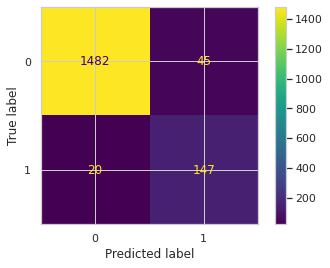

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
Models_scores['Logreg'] = [score_Logreg,cr_Logreg]

In [ ]:
#Gridsearch MLP
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }
mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)
print(mlp_classif_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'activation': 'tanh', 'hidden_layer_sizes': (50, 75, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [ ]:
#MLP
classifier = MLPClassifier(hidden_layer_sizes=(50,75,100),activation = 'tanh',random_state=123,learning_rate='adaptive',solver='sgd')
classifier.fit(X_train,y_train)
y_Mlp=classifier.predict(X_test)
score_Mlp=classifier.score(X_test,y_test)
score_Mlp

0.9669421487603306

In [ ]:
cr_Mlp = classification_report(y_test, y_Mlp)
print(cr_Mlp)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1527
           1       0.84      0.82      0.83       167

    accuracy                           0.97      1694
   macro avg       0.91      0.90      0.91      1694
weighted avg       0.97      0.97      0.97      1694



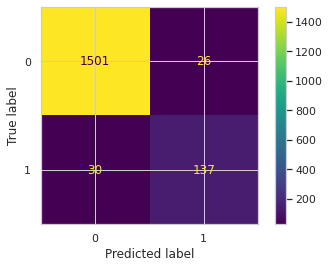

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [ ]:

model = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators= 100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9574970484061394

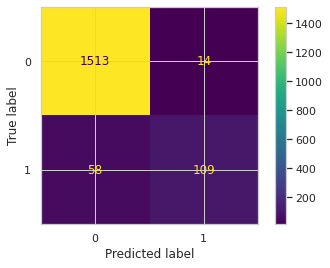

In [ ]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [ ]:
model_rf = RandomForestClassifier(n_estimators= 1000, max_depth=150)
model_rf.fit(X_train,y_train)
score_rf = model_rf.score(X_test,y_test)
y_pred_rf = model.predict(X_test)
print(score_rf)
print(classification_report(y_test, y_pred_rf))

0.9634002361275088
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1527
           1       0.89      0.65      0.75       167

    accuracy                           0.96      1694
   macro avg       0.92      0.82      0.86      1694
weighted avg       0.96      0.96      0.95      1694



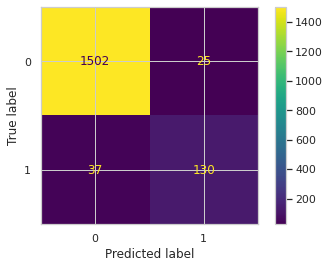

In [ ]:
plot_confusion_matrix(model_rf, X_test, y_test)  
plt.show()

In [ ]:
model = AdaBoostClassifier(n_estimators= 1000)
model.fit(X_train,y_train)
score_ab=model.score(X_test,y_test)
y_pred_ab = model.predict(X_test)
print(score_ab)
print(classification_report(y_test, y_pred_ab))

0.9557260920897285
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1527
           1       0.81      0.72      0.76       167

    accuracy                           0.96      1694
   macro avg       0.89      0.85      0.87      1694
weighted avg       0.95      0.96      0.95      1694



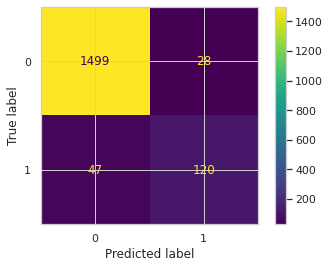

In [ ]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [ ]:
#Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators= 100)
model.fit(X_train,y_train)
y_prd_g = model.predict(X_test)
score_Gbc = model.score(X_test,y_test)
print(score_Gbc)
print(classification_report(y_test, y_prd_g))

0.9675324675324676
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1527
           1       0.85      0.82      0.83       167

    accuracy                           0.97      1694
   macro avg       0.91      0.90      0.91      1694
weighted avg       0.97      0.97      0.97      1694



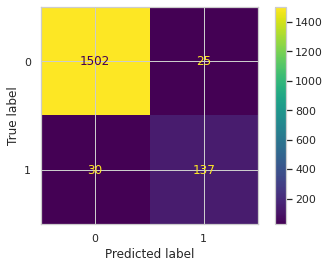

In [ ]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [ ]:

model = StackingClassifier([('KNN',KNN),('SVM',clf),('logreg',logreg)],final_estimator=KNeighborsClassifier())
model.fit(X_train,y_train)
score_sc = model.score(X_test,y_test)
y_prrd = model.predict(X_test)
print(score_sc)
print(classification_report(y_test, y_prrd))

0.9604486422668241
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1527
           1       0.79      0.82      0.80       167

    accuracy                           0.96      1694
   macro avg       0.88      0.90      0.89      1694
weighted avg       0.96      0.96      0.96      1694



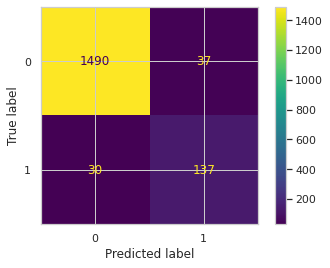

In [ ]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()